# Suicide Rates Overview

## Introduction

World Health Organization (WHO) states that "Close to 800,000 people die due to suicide every year, which is one person every 40 seconds". The suicide rate in lots of countries have been quite high for many years, including the developing and developed countries.
Suicide has been a global phenomenon and it is more common than we might think. 

The goal of this project is to analyze the differences of suicide rate among countries, gender groups and age groups, as well as to figure out if there are any factors that may be correlated with the suicide rate. Through this project, I hope to draw more poeple's attention to this serious global public health issue.

In [598]:
# set up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [599]:
suicide =  pd.read_csv('data/master.csv', header = 0)

In [600]:
test = suicide[:3]

In [601]:
test

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X


In [602]:
test1 =(test.groupby(by=["sex"])["suicides_no"].sum()*100000/ test.groupby(by=["sex"])["population"].sum()).reset_index()
test1.columns = ['sex', 'suicide_rate']

In [603]:
test1

,sex,suicide_rate
0,female,4.832585
1,male,5.959092


In [604]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [605]:
suicide.age

0        15-24 years
1        35-54 years
2        15-24 years
3          75+ years
4        25-34 years
            ...     
27815    35-54 years
27816      75+ years
27817     5-14 years
27818     5-14 years
27819    55-74 years
Name: age, Length: 27820, dtype: object

In [606]:
suicide = suicide.replace("5-14 years", "05-14 years")

In [607]:
suicide_year = suicide.groupby(by=["year"])["suicides_no"].sum().reset_index()

In [608]:
suicide_year

,year,suicides_no
0,1985,116063
1,1986,120670
2,1987,126842
3,1988,121026
4,1989,160244
5,1990,193361
6,1991,198020
7,1992,211473
8,1993,221565
9,1994,232063


We can see that 2016 has a significant drop in the suicide count. This could due to the no enough data for the last year. Therefore, I decide to drop the data from 2016.

In [609]:
suicide = suicide[suicide.year != 2016]

In [610]:
sns.set_style("darkgrid")

# GLobal Suicide Overview

## Country

,country,suicides_no
74,Russian Federation,1209742
97,United States,1034013
46,Japan,806902
33,France,329127
94,Ukraine,319950
35,Germany,291262
72,Republic of Korea,261730
15,Brazil,226613
68,Poland,139098
96,United Kingdom,136805


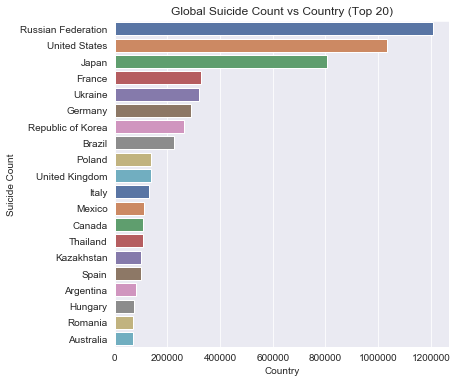

In [611]:
suicide_country = suicide.groupby(by=["country"])["suicides_no"].sum().reset_index()
suicide_country = suicide_country.sort_values(by='suicides_no', ascending=False)
suicide_country = suicide_country[:20]

display(suicide_country)

plt.figure(figsize=(6,6))
plot = sns.barplot(x='suicides_no', y='country', data=suicide_country, palette="deep")
plt.xlabel('Country')
plt.ylabel('Suicide Count')
plt.title('Global Suicide Count vs Country (Top 20)')
plt.savefig('plot/global_country.png')

,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
...,...,...
1,Antigua and Barbuda,0.552700
45,Jamaica,0.466037
64,Oman,0.367194
27,Dominica,0.000000


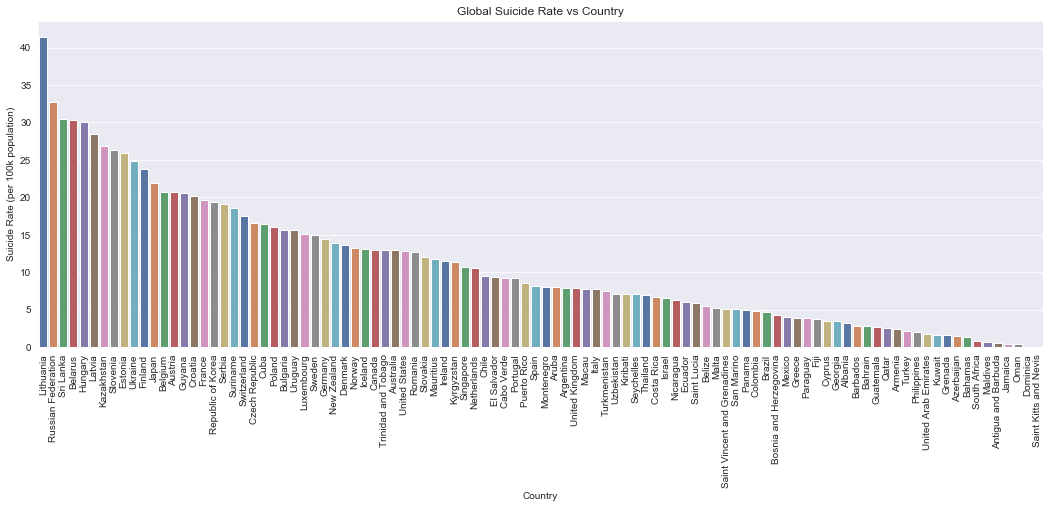

In [659]:
suicide_rate_country =(suicide.groupby(by=["country"])["suicides_no"].sum()*100000/ suicide.groupby(by=["country"])["population"].sum()).reset_index()
suicide_rate_country.columns = ['country', 'suicide_rate']
suicide_rate_country = suicide_rate_country.sort_values(by='suicide_rate', ascending=False)

display(suicide_rate_country)

plt.figure(figsize=(18,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country, palette="deep")
plt.xlabel('Country')
# plt.yticks(fontsize=5)
plt.xticks(rotation=90)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country')
plt.savefig('plot/global_country_rate.png')

,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
51,Latvia,28.471011
47,Kazakhstan,26.898614
83,Slovenia,26.360477
30,Estonia,25.964525
94,Ukraine,24.870398


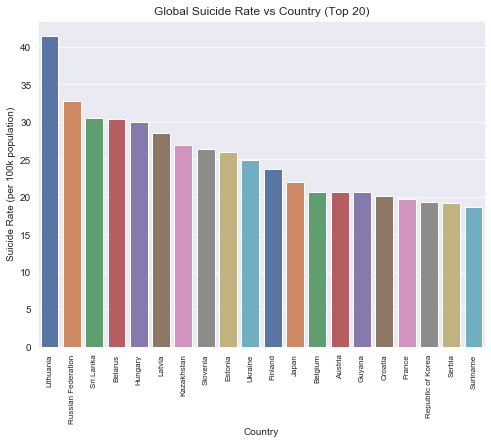

In [671]:
suicide_rate_country_top = suicide_rate_country[:20]

display(suicide_rate_country_top)

plt.figure(figsize=(8,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country_top, palette="deep")
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country (Top 20)')
plt.savefig('plot/global_country_rate_top.png')

,country,suicide_rate
52,Lithuania,41.464101
74,Russian Federation,32.777207
86,Sri Lanka,30.483939
11,Belarus,30.344685
40,Hungary,30.022407
...,...,...
1,Antigua and Barbuda,0.552700
45,Jamaica,0.466037
64,Oman,0.367194
27,Dominica,0.000000


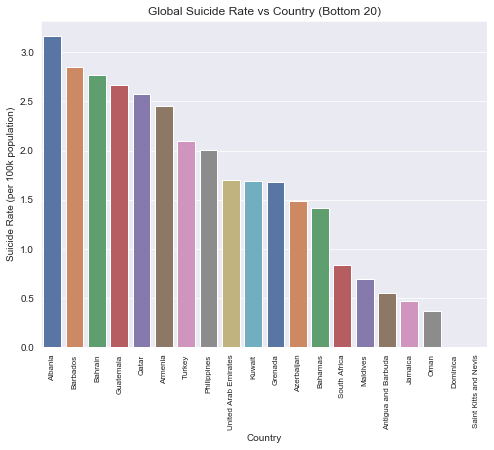

In [673]:
suicide_rate_country_bottom = suicide_rate_country[-20:]

display(suicide_rate_country)

plt.figure(figsize=(8,6))
plot = sns.barplot(y='suicide_rate', x='country', data=suicide_rate_country_bottom, palette="deep")
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.xticks(fontsize=8)
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Country (Bottom 20)')
plt.savefig('plot/global_country_rate_bottom.png')

## Sex

,sex,suicides_no
0,female,1556006
1,male,5176811


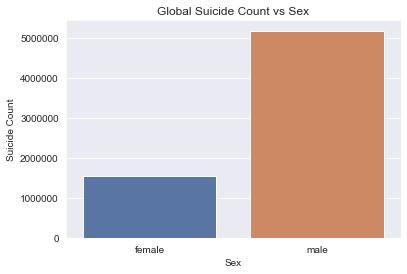

In [674]:
suicide_sex = suicide.groupby(by=["sex"])["suicides_no"].sum().reset_index()

display(suicide_sex)

plot = sns.barplot(x='sex', y='suicides_no', data=suicide_sex, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Count')
plt.title('Global Suicide Count vs Sex')
plt.savefig('plot/global_sex.png')

,sex,suicide_rate
0,female,5.937727
1,male,20.719972


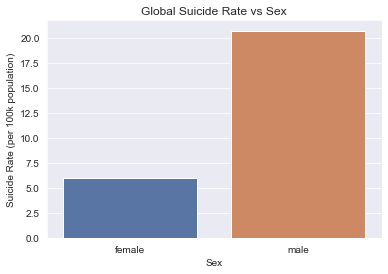

In [616]:
suicide_rate_sex =(suicide.groupby(by=["sex"])["suicides_no"].sum()*100000/ suicide.groupby(by=["sex"])["population"].sum()).reset_index()
suicide_rate_sex.columns = ['sex', 'suicide_rate']

display(suicide_rate_sex)

plot = sns.barplot(x='sex', y='suicide_rate', data=suicide_rate_sex, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Sex')
plt.savefig('plot/global_sex_rate.png')

## Age

,age,suicides_no
0,05-14 years,52264
1,15-24 years,807347
2,25-34 years,1121842
3,35-54 years,2446375
4,55-74 years,1653728
5,75+ years,651261


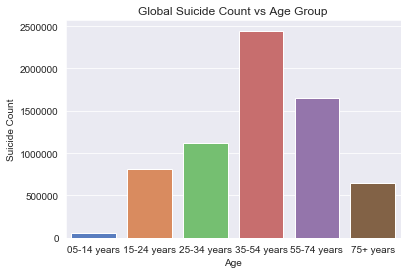

In [676]:
suicide_age = suicide.groupby(by=["age"])["suicides_no"].sum().reset_index()

display(suicide_age)

plot = sns.barplot(x='age', y='suicides_no', data=suicide_age, palette="muted")
# plt.setp(plot.get_xticklabels(), rotation=45)
plt.xlabel('Age')
plt.ylabel('Suicide Count')
plt.title('Global Suicide Count vs Age Group')
plt.savefig('plot/global_age.png')

,age,suicide_rate
0,05-14 years,0.622287
1,15-24 years,9.363095
2,25-34 years,13.330724
3,35-54 years,17.073403
4,55-74 years,18.854152
5,75+ years,24.543314


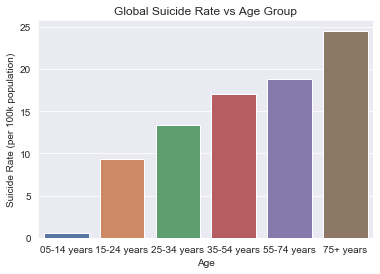

In [618]:
suicide_rate_age =(suicide.groupby(by=["age"])["suicides_no"].sum()*100000/ suicide.groupby(by=["age"])["population"].sum()).reset_index()
suicide_rate_age.columns = ['age', 'suicide_rate']

display(suicide_rate_age)

plot = sns.barplot(x='age', y='suicide_rate', data=suicide_rate_age, palette="deep")
plt.xlabel('Age')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Age Group')
plt.savefig('plot/global_age_rate.png')

## Time

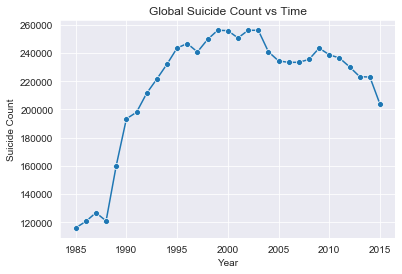

In [619]:
suicide_year = suicide.groupby(by=["year"])["suicides_no"].sum().reset_index()

plot = sns.lineplot(x='year', y='suicides_no', data=suicide_year, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.title('Global Suicide Count vs Time')
plt.savefig('plot/global_year.png')

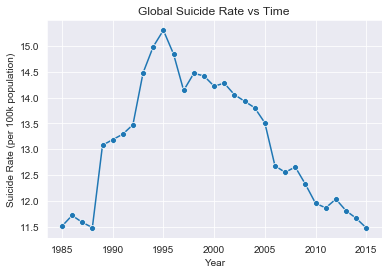

In [620]:
suicide_rate_year =(suicide.groupby(by=["year"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year"])["population"].sum()).reset_index()
suicide_rate_year.columns = ['year', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', data=suicide_rate_year, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate.png')

# US

In [621]:
suicide_us = suicide.loc[suicide['country'] == 'United States']


In [622]:
suicide_us

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
26848,United States,1985,male,75+ years,2177,4064000,53.57,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26849,United States,1985,male,55-74 years,5302,17971000,29.50,United States1985,0.841,"4,346,734,000,000",19693,G.I. Generation
26850,United States,1985,male,25-34 years,5134,20986000,24.46,United States1985,0.841,"4,346,734,000,000",19693,Boomers
26851,United States,1985,male,35-54 years,6053,26589000,22.77,United States1985,0.841,"4,346,734,000,000",19693,Silent
26852,United States,1985,male,15-24 years,4267,19962000,21.38,United States1985,0.841,"4,346,734,000,000",19693,Generation X
...,...,...,...,...,...,...,...,...,...,...,...,...
27215,United States,2015,female,25-34 years,1444,21555712,6.70,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27216,United States,2015,female,15-24 years,1132,21633813,5.23,United States2015,NaN,"18,120,714,000,000",60387,Millenials
27217,United States,2015,female,75+ years,540,11778666,4.58,United States2015,NaN,"18,120,714,000,000",60387,Silent
27218,United States,2015,male,05-14 years,255,21273987,1.20,United States2015,NaN,"18,120,714,000,000",60387,Generation Z


,sex,suicides_no
0,female,213797
1,male,820216


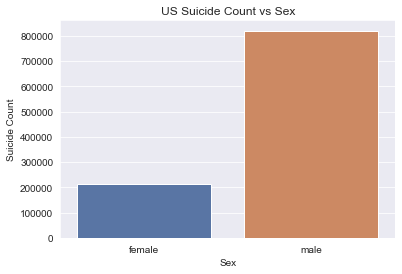

In [623]:
suicide_sex_us = suicide_us.groupby(by=["sex"])["suicides_no"].sum().reset_index()

display(suicide_sex_us)

plot = sns.barplot(x='sex', y='suicides_no', data=suicide_sex_us, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Count')
plt.title('US Suicide Count vs Sex')
plt.savefig('plot/us_sex.png')

,sex,suicide_rate
0,female,5.197197
1,male,20.815927


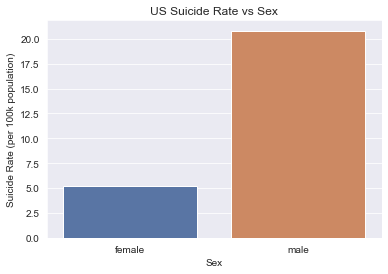

In [624]:
suicide_rate_sex_us =(suicide_us.groupby(by=["sex"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["sex"])["population"].sum()).reset_index()
suicide_rate_sex_us.columns = ['sex', 'suicide_rate']

display(suicide_rate_sex_us)

plot = sns.barplot(x='sex', y='suicide_rate', data=suicide_rate_sex_us, palette="deep")
plt.xlabel('Sex')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Sex')
plt.savefig('plot/us_sex_rate.png')

,age,suicides_no
0,05-14 years,8923
1,15-24 years,141679
2,25-34 years,182047
3,35-54 years,380917
4,55-74 years,224770
5,75+ years,95677


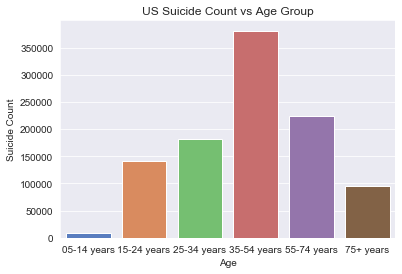

In [677]:
suicide_age_us = suicide_us.groupby(by=["age"])["suicides_no"].sum().reset_index()

display(suicide_age_us)

plot = sns.barplot(x='age', y='suicides_no', data=suicide_age_us, palette="muted")
# plt.setp(plot.get_xticklabels(), rotation=45)
plt.xlabel('Age')
plt.ylabel('Suicide Count')
plt.title('US Suicide Count vs Age Group')
plt.savefig('plot/us_age.png')

,age,suicide_rate
0,05-14 years,0.740195
1,15-24 years,11.440654
2,25-34 years,14.248856
3,35-54 years,16.061758
4,55-74 years,15.388197
5,75+ years,19.124520


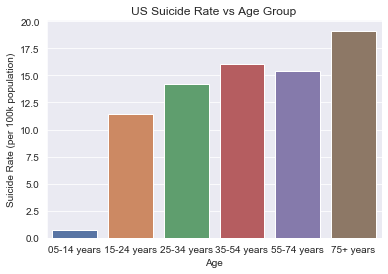

In [626]:
suicide_rate_age_us =(suicide_us.groupby(by=["age"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["age"])["population"].sum()).reset_index()
suicide_rate_age_us.columns = ['age', 'suicide_rate']

display(suicide_rate_age_us)

plot = sns.barplot(x='age', y='suicide_rate', data=suicide_rate_age_us, palette="deep")
plt.xlabel('Age')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Age Group')
plt.savefig('plot/us_age_rate.png')

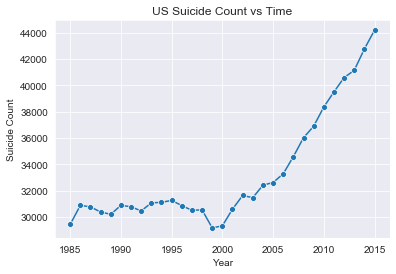

In [627]:
suicide_year_us = suicide_us.groupby(by=["year"])["suicides_no"].sum().reset_index()

plot = sns.lineplot(x='year', y='suicides_no', data=suicide_year_us, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Count')
plt.title('US Suicide Count vs Time')
plt.savefig('plot/us_year.png')

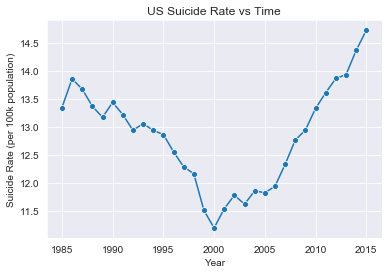

In [628]:
suicide_rate_year_us =(suicide_us.groupby(by=["year"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year"])["population"].sum()).reset_index()
suicide_rate_year_us.columns = ['year', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', data=suicide_rate_year_us, palette="dark", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate.png')

## Time-sex

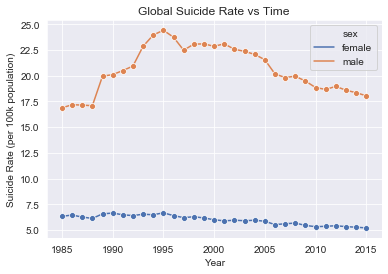

In [629]:
suicide_rate_year_sex =(suicide.groupby(by=["year", "sex"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "sex"])["population"].sum()).reset_index()
suicide_rate_year_sex.columns = ['year', 'sex', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='sex', data=suicide_rate_year_sex, palette="deep", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate_sex.png')

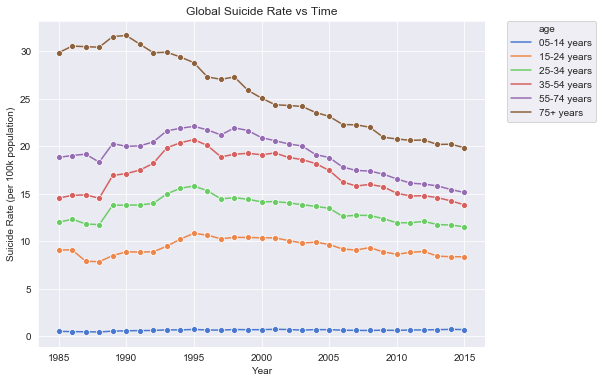

In [655]:
suicide_rate_year_age =(suicide.groupby(by=["year", "age"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "age"])["population"].sum()).reset_index()
suicide_rate_year_age.columns = ['year', 'age', 'suicide_rate']

plt.figure(figsize=(8,6))
plot = sns.lineplot(x='year', y='suicide_rate', hue='age', data=suicide_rate_year_age, palette="muted", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('Global Suicide Rate vs Time')
plt.savefig('plot/global_year_rate_age.png')

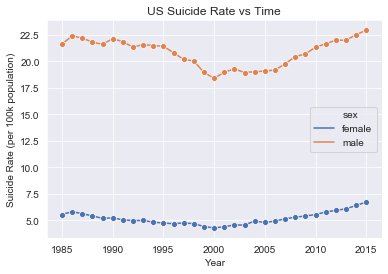

In [631]:
suicide_rate_year_sex_us =(suicide_us.groupby(by=["year", "sex"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year", "sex"])["population"].sum()).reset_index()
suicide_rate_year_sex_us.columns = ['year', 'sex', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='sex', data=suicide_rate_year_sex_us, palette="deep", marker='o')
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate_sex.png')

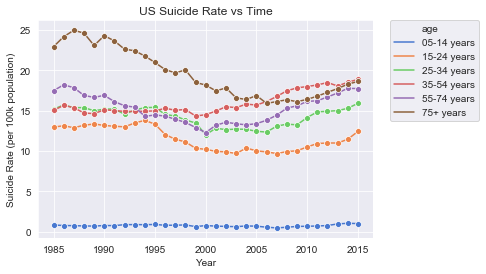

In [632]:
suicide_rate_year_age_us =(suicide_us.groupby(by=["year", "age"])["suicides_no"].sum()*100000/ suicide_us.groupby(by=["year", "age"])["population"].sum()).reset_index()
suicide_rate_year_age_us.columns = ['year', 'age', 'suicide_rate']


plot = sns.lineplot(x='year', y='suicide_rate', hue='age', data=suicide_rate_year_age_us, palette="muted", marker='o')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('Year')
plt.ylabel('Suicide Rate (per 100k population)')
plt.title('US Suicide Rate vs Time')
plt.savefig('plot/us_year_rate_age.png')

In [633]:
# plot = sns.lineplot(x='gdp_per_capita ($)', y='suicides/100k pop', data=suicide, palette="muted", marker='o')


In [634]:
# suicide_rate_year_gdp =(suicide.groupby(by=["year", "gdp_per_capita ($)"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "gdp_per_capita ($)"])["population"].sum()).reset_index()
# suicide_rate_year_gdp.columns = ['year', 'gdp_per_capita', 'suicide_rate']

# plt.figure(figsize=(6,6))
# plot = sns.lineplot(x='gdp_per_capita', y='suicide_rate', data=suicide_rate_year_gdp, palette="dark", marker='o')


# # plt.xlabel('Year')
# # plt.ylabel('Suicide Rate (per 100k population)')
# # plt.title('US Suicide Rate vs Time')
# # plt.savefig('plot/us_year_rate.png')

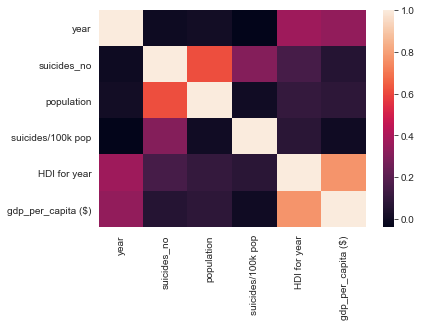

In [635]:
corr = suicide.corr()
plot = sns.heatmap(corr)

In [636]:
suicide.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object

In [637]:
suicide_corr = suicide[["sex", "age", "HDI for year", "gdp_per_capita ($)", "suicides/100k pop"]]
suicide_corr.columns = ['sex', 'age', 'HDI', 'gdp_per_capita', 'suicide_rate']

In [638]:
suicide_corr

,sex,age,HDI,gdp_per_capita,suicide_rate
0,male,15-24 years,NaN,796,6.71
1,male,35-54 years,NaN,796,5.19
2,female,15-24 years,NaN,796,4.83
3,male,75+ years,NaN,796,4.59
4,male,25-34 years,NaN,796,3.28
...,...,...,...,...,...
27815,female,35-54 years,0.675,2309,2.96
27816,female,75+ years,0.675,2309,2.58
27817,male,05-14 years,0.675,2309,2.17
27818,female,05-14 years,0.675,2309,1.67


In [639]:
suicide_corr = suicide_corr.dropna()
suicide_corr

,sex,age,HDI,gdp_per_capita,suicide_rate
72,male,25-34 years,0.619,835,5.58
73,male,55-74 years,0.619,835,5.06
74,female,75+ years,0.619,835,4.90
75,female,15-24 years,0.619,835,4.59
76,male,15-24 years,0.619,835,4.56
...,...,...,...,...,...
27815,female,35-54 years,0.675,2309,2.96
27816,female,75+ years,0.675,2309,2.58
27817,male,05-14 years,0.675,2309,2.17
27818,female,05-14 years,0.675,2309,1.67


In [640]:
suicide_corr = suicide_corr.replace("male", 1)
suicide_corr = suicide_corr.replace("female", 0)

In [641]:
suicide_corr

,sex,age,HDI,gdp_per_capita,suicide_rate
72,1,25-34 years,0.619,835,5.58
73,1,55-74 years,0.619,835,5.06
74,0,75+ years,0.619,835,4.90
75,0,15-24 years,0.619,835,4.59
76,1,15-24 years,0.619,835,4.56
...,...,...,...,...,...
27815,0,35-54 years,0.675,2309,2.96
27816,0,75+ years,0.675,2309,2.58
27817,1,05-14 years,0.675,2309,2.17
27818,0,05-14 years,0.675,2309,1.67


In [642]:
suicide_corr = suicide_corr.replace("05-14 years", 0)
suicide_corr = suicide_corr.replace("15-24 years", 1)
suicide_corr = suicide_corr.replace("25-34 years", 2)
suicide_corr = suicide_corr.replace("35-54 years", 3)
suicide_corr = suicide_corr.replace("55-74 years", 4)
suicide_corr = suicide_corr.replace("75+ years", 5)

In [643]:
suicide_corr

,sex,age,HDI,gdp_per_capita,suicide_rate
72,1,2,0.619,835,5.58
73,1,4,0.619,835,5.06
74,0,5,0.619,835,4.90
75,0,1,0.619,835,4.59
76,1,1,0.619,835,4.56
...,...,...,...,...,...
27815,0,3,0.675,2309,2.96
27816,0,5,0.675,2309,2.58
27817,1,0,0.675,2309,2.17
27818,0,0,0.675,2309,1.67


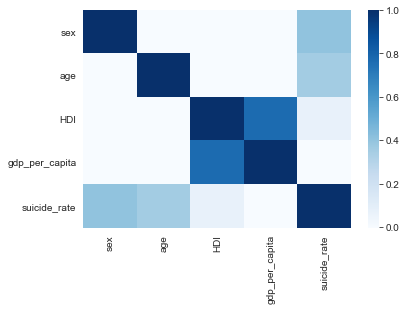

In [644]:
corr = suicide_corr.corr()
# sns.color_palette("cubehelix", as_cmap=True)
# plot = sns.heatmap(corr, cmap="YlGnBu")
plot = sns.heatmap(corr, cmap="Blues")
# plot = sns.heatmap(corr)


In [645]:
corr

,sex,age,HDI,gdp_per_capita,suicide_rate
sex,1.000000e+00,0.000000e+00,0.000000e+00,-9.632384e-19,0.406362
age,0.000000e+00,1.000000e+00,-8.325048e-20,6.993782e-19,0.361738
HDI,0.000000e+00,-8.325048e-20,1.000000e+00,7.712278e-01,0.074279
gdp_per_capita,-9.632384e-19,6.993782e-19,7.712278e-01,1.000000e+00,-0.002339
suicide_rate,4.063617e-01,3.617375e-01,7.427907e-02,-2.339023e-03,1.000000


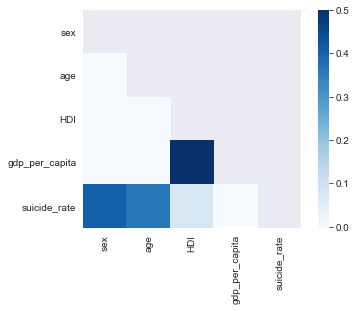

In [646]:
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plot = sns.heatmap(corr, cmap="Blues", mask=mask, vmax=.5, square=True)
plt.savefig('plot/corr_matrix.png')

In [647]:
suicide_rate_gdp_HDI =(suicide.groupby(by=["year", "country", "gdp_per_capita ($)", "HDI for year"])["suicides_no"].sum()*100000/ suicide.groupby(by=["year", "country", "gdp_per_capita ($)", "HDI for year"])["population"].sum()).reset_index()
suicide_rate_gdp_HDI.columns = ['year', 'country', 'gdp_per_capita', 'HDI', 'suicide_rate']

In [648]:
suicide_rate_gdp_HDI=suicide_rate_gdp_HDI.drop(['year'], axis=1)
suicide_rate_gdp_HDI

,country,gdp_per_capita,HDI,suicide_rate
0,Argentina,3264,0.694,7.338285
1,Austria,9759,0.764,29.408807
2,Bahrain,9980,0.727,3.006286
3,Barbados,6137,0.700,3.030303
4,Belgium,9356,0.774,24.607319
...,...,...,...,...
692,Ukraine,3299,0.747,19.691497
693,United Kingdom,49906,0.907,7.904841
694,United States,58531,0.915,14.364077
695,Uruguay,18012,0.793,18.598679


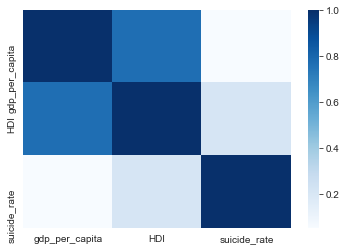

In [649]:
corr2 = suicide_rate_gdp_HDI.corr()
# sns.color_palette("cubehelix", as_cmap=True)
# plot = sns.heatmap(corr, cmap="YlGnBu")
plot = sns.heatmap(corr2, cmap="Blues")

In [650]:
corr2

,gdp_per_capita,HDI,suicide_rate
gdp_per_capita,1.000000,0.771228,0.054185
HDI,0.771228,1.000000,0.216660
suicide_rate,0.054185,0.216660,1.000000


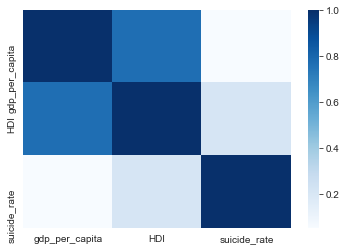

In [651]:
suicide_rate_gdp_HDI = suicide_rate_gdp_HDI.dropna() 
corr2 = suicide_rate_gdp_HDI.corr()
# sns.color_palette("cubehelix", as_cmap=True)
# plot = sns.heatmap(corr, cmap="YlGnBu")
plot = sns.heatmap(corr2, cmap="Blues")

In [652]:
corr2

,gdp_per_capita,HDI,suicide_rate
gdp_per_capita,1.000000,0.771228,0.054185
HDI,0.771228,1.000000,0.216660
suicide_rate,0.054185,0.216660,1.000000
